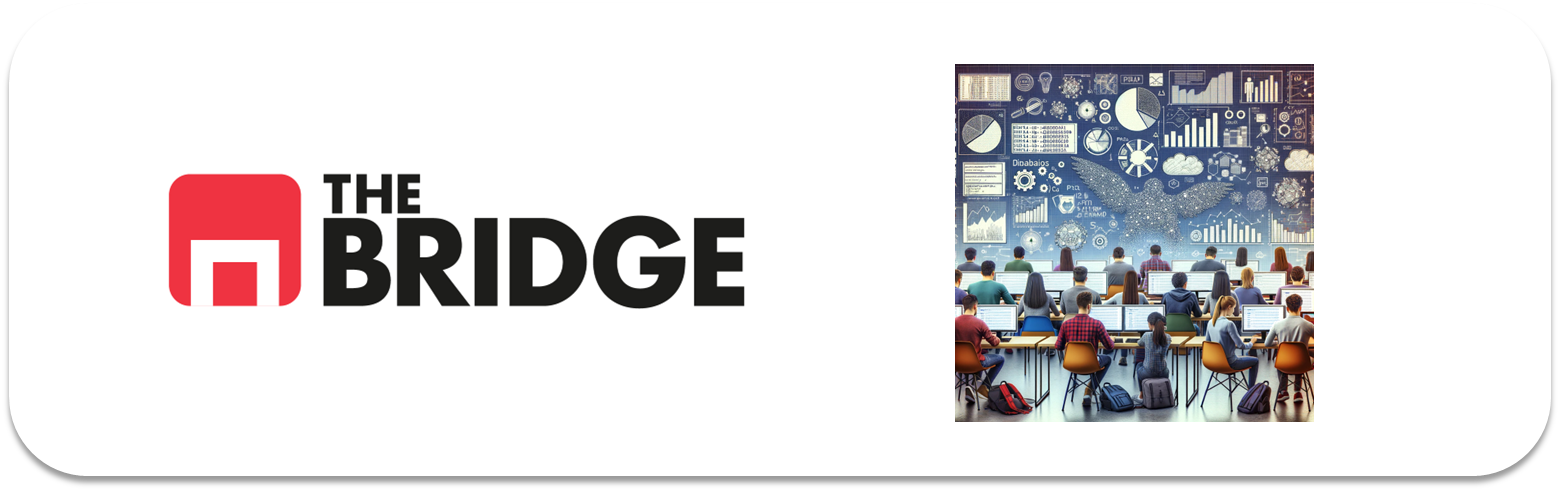

## PRACTICA OBLIGATORIA: **Regresion Lineal y Regularización**

* La práctica obligatoria de esta unidad consiste en hacer un modelado completo de un problema que ya conoces, la predicción de casas, pero con otro dataset. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Modelo de Regresión Lineal

El objetivo del modelo que tienes que construir es predecir la mediana del precio de las casas en una zona del área metropolitana de Boston dadas las características de las mismas. Sí, es parecido pero no igual a lo que hemos venido haciendo.

Aquí tienes una descripción de las variables del dataset, del que tendrás que decidir el target:  

***CRIM:*** Tasa de criminalidad per cápita por ciudad  
***ZN:*** Proporción de terreno residencial destinado a lotes de más de 25,000 pies cuadrados  
***INDUS:*** Proporción de acres de negocios no minoristas por ciudad  
***CHAS:*** Variable ficticia del río Charles (= 1 si el sector limita con el río; 0 en caso contrario)  
***NOX:*** Concentración de óxidos de nitrógeno (partes por 10 millones)  
***RM:*** Número promedio de habitaciones por vivienda  
***AGE:*** Proporción de unidades ocupadas por el propietario construidas antes de 1940  
***DIS:*** Distancias ponderadas a cinco centros de empleo de Boston  
***RAD:*** Índice de accesibilidad a autopistas radiales  
***TAX:*** Tasa de impuesto sobre la propiedad de valor total por $10,000  
***PTRATIO:*** Relación alumno-maestro por ciudad  
***LSTAT:*** % de población de estatus socioeconómico bajo  
***MEDV:*** Valor medio de las viviendas ocupadas por sus propietarios en miles de dólares  

### Indicaciones

A continuación tienes las indicaciones para hacer el modelado. No necesariamente tienes que seguirlos al pie de la letra, porque a partir de ahora ya las práctica obligatorias dejarán de ser mayormente guiadas por ejercicios y serán más de libre desarrollo, aunque con objetivos específicos, claros y determinados. 

En concreto se pide hacer un modelo de regresión lineal, evaluarlo contra un dataset de test reservado del original mostrando MAE,RMSE,MSE y $R2$, comparar las predicciones con los valores reales y realizar al menos un tipo de regularización de las conocidas, testando por lo menos 3 valores diferentes de hiperparámetros.

Los pasos para guiar el trabajo:
1. Carga el dataset. Está limpio y no necesitarás completar nulos, ni repasar los valores de las columnas.
2. Escoge y analiza la variable target de forma gráfica para ver la idoneidad de hacer un modelo de regresión.
3. Haz el split en train y test que creas conveniente y de la forma que creas conveniente.
4. Construye las parejas X,y de train y test
5. Haz un mini-EDA, selecciona las features que quieres quedarte y por qué.
6. Trata las variables para que funcionen lo mejor posible en el modelo.
7. Construye un modelo de regresión lineal.
8. Analiza si lo crees conveniente los pesos y la importancia de las features.
8. Evalúa tu modelo. Haz un pequeño assesmente de su generabilidad. Compara gráficamente las predicciones con los valores reales.
9. Regulariza al menos con un modelo alternativo y juega con 3 posibles valores de los hiperparámetros del modelo de regularización.
10. Expresa tus conclusiones, en concreto ¿con qué modelo te quedarías?¿por qué?



In [52]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
from math import sqrt
from scipy.stats import gaussian_kde
from scipy.integrate import quad
from statsmodels.stats.proportion import proportion_confint
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression



In [53]:
df = pd.read_csv('./data/hard_to_find/obligatoria_hard.csv', sep = '|')
 #uso sep = '|' porque las variables estan en una misma columna, para separarlas

In [54]:
df.describe

<bound method NDFrame.describe of         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO  LSTAT  MEDV  
0       15.3   4.98  24.0  
1       1

In [55]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'LSTAT', 'MEDV'],
      dtype='object')

Elijo como variable target MEDV y hago un diagrama de dispersión con la variables independiente RM (por ejemplo) para ver si hay una relación lineal y si es viable hacer un modelo de regresión. Además de scatterplot, haré un distplot.

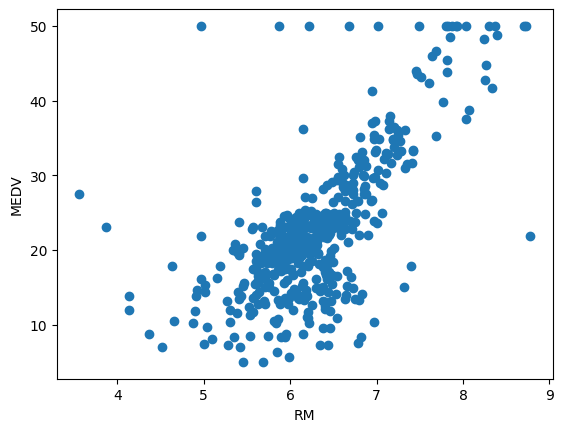

In [56]:
plt.scatter(df['RM'], df['MEDV'])
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.show()


C:\Users\estel\AppData\Local\Temp\ipykernel_24908\167380803.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["MEDV"])


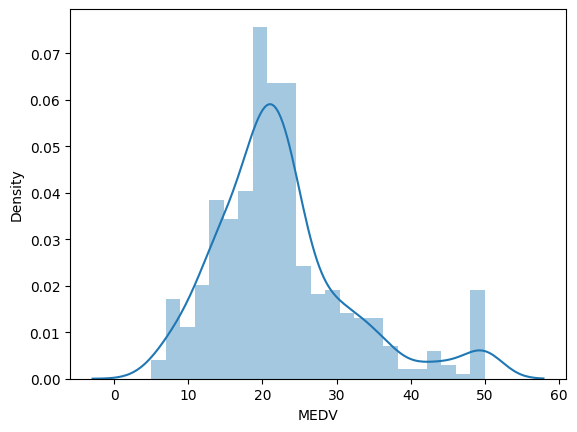

In [57]:
sns.distplot(df["MEDV"])
plt.show()

Se ve claramente una relación lineal, en forma de campana de Gauss, con lo cual empezamos con el estudio.

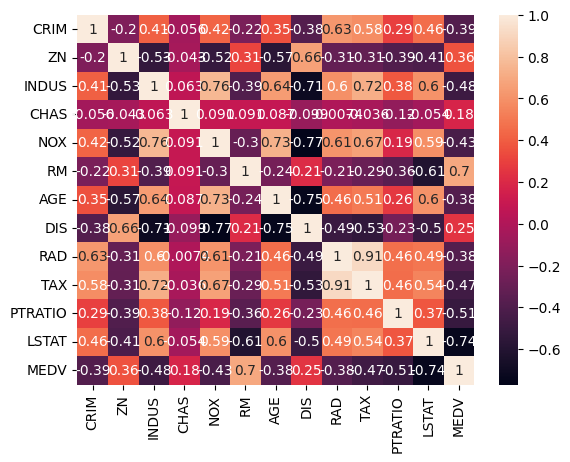

In [58]:
#hacemos un mapa de calor para ver la correlacion
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.show()

Con esto, observamos que MDEV tiene una mayor correlación con ZN, CHAS, DIS Y RM.

In [59]:
#separamos la variable target MEDV de las variables independientes en dos dataframes
#x tendra la variable target, y tendra las variables independientes
X = df.drop('MEDV', axis=1)
y = df['MEDV']


In [60]:
#dividimos los datos en dos conjuntos: entrenamiento/train (80%) y prueba/set (20%)
#crearemos cuatro dataframes:
#x_train contiene las variables independientes de entrenamiento
#x_test contiene las variables independientes de prueba
#y_train contiene la variable target de entrenamiento
#y_test contiene la variable target de prueba

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [61]:
#creamos el modelo de regresion lineal

lm = LinearRegression()

In [62]:
#entrenamos con los datos de train 
lm.fit(X_train, y_train)

LinearRegression()

In [66]:
#calculamos el w0, que es el valor que tendriamos si todas las features fueran 0
lm.intercept_

46.82104377803333

In [64]:
#calculamos los pesos/parametros de cada feature
lm.coef_

array([-1.47044632e-01,  5.34194237e-02,  6.15386324e-02,  3.61094866e+00,
       -2.23378813e+01,  3.08778710e+00,  7.49749424e-03, -1.61675539e+00,
        3.39071680e-01, -1.43631009e-02, -9.12916943e-01, -5.75049097e-01])

In [68]:
#hacemos predicciones
casa = np.array([[5, 50, 30, 1, 300, 3, 1, 100, 50, 5, 20, 25]])
lm.predict(casa)

c:\Users\estel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([-6815.30796825])

In [69]:
X_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
101,0.11432,0.0,8.56,0.0,0.520,6.781,71.3,2.8561,5.0,384.0,20.9,7.67
306,0.07503,33.0,2.18,0.0,0.472,7.420,71.9,3.0992,7.0,222.0,18.4,6.47
400,25.04610,0.0,18.10,0.0,0.693,5.987,100.0,1.5888,24.0,666.0,20.2,26.77
150,1.65660,0.0,19.58,0.0,0.871,6.122,97.3,1.6180,5.0,403.0,14.7,14.10
82,0.03659,25.0,4.86,0.0,0.426,6.302,32.2,5.4007,4.0,281.0,19.0,6.72
...,...,...,...,...,...,...,...,...,...,...,...,...
314,0.36920,0.0,9.90,0.0,0.544,6.567,87.3,3.6023,4.0,304.0,18.4,9.28
113,0.22212,0.0,10.01,0.0,0.547,6.092,95.4,2.5480,6.0,432.0,17.8,17.09
327,0.24103,0.0,7.38,0.0,0.493,6.083,43.7,5.4159,5.0,287.0,19.6,12.79
405,67.92080,0.0,18.10,0.0,0.693,5.683,100.0,1.4254,24.0,666.0,20.2,22.98


In [70]:
predictions = lm.predict(X_test)
predictions

array([25.25988362, 35.26998201, 10.1763851 , 19.72206746, 26.01383562,
       15.62963999, 18.23655022, 41.51174971, 33.09787672, 18.72514274,
       17.42542239, 19.29985296, 34.34498931, 17.33358264,  8.67221509,
       23.42657193, 28.10701873, 18.72682814, 34.46807602, 33.73204861,
       31.16476722, 21.82242828, 15.48061303, 39.15899905, 16.60355061,
       24.01697622, 21.00591074, 16.13483228, 13.50688339, 27.11444481,
       29.63358931, 40.61480336, 27.20293269, -3.38376435, 25.38682209,
       15.15527549, 26.77166835, 14.19393002, 16.99397634, 12.60234906,
       33.8656081 , 22.3190978 , 23.92438082, 15.4601933 , 38.50637591,
       23.17090332, 22.06232781, 11.90313599, 17.8727572 , 23.49105489,
       29.40865855, 25.08040844, 29.9795316 , 16.01892203, 36.1910735 ,
       26.04553508, 21.46065397, 20.48456029, 21.08097161, 20.97959134,
       23.6820932 , 26.05152968, 24.49725689, 19.28144943, 27.55386115,
       10.01166622, 20.64797365, 29.35934029, 19.33588177, 26.94

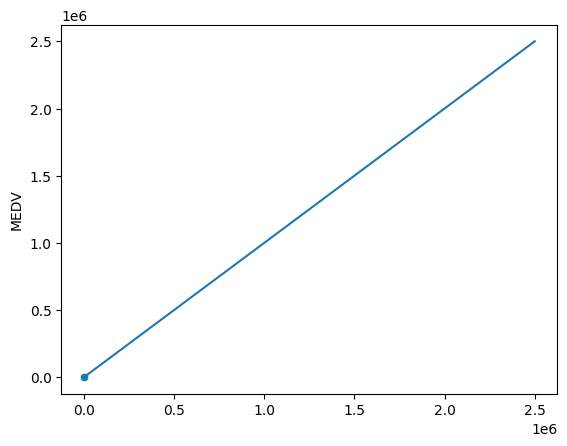

In [72]:
sns.scatterplot(x=predictions,y=y_test)
plt.plot([0,2.5e6], [0,2.5e6])
plt.show()

Ahora se hará una evaluación a partir de las métricas de error: MAE, MSE, RMSE Y R2.

In [73]:
from sklearn import metrics
#calculamos los errores en train
pred_train = lm.predict(X_train)
print('MAE train', metrics.mean_absolute_error(y_train, pred_train))
print('MSE train', metrics.mean_squared_error(y_train, pred_train))
print('RMSE train', np.sqrt(metrics.mean_squared_error(y_train, pred_train)))
print('R2 train', lm.score(X_train,y_train))

MAE train 3.4312390591726456
MSE train 23.473340873151187
RMSE train 4.844929398159604
R2 train 0.7080897460537621


In [74]:
#calculamos los errores en test
print('MAE test', metrics.mean_absolute_error(y_test, predictions))
print('MSE test', metrics.mean_squared_error(y_test, predictions))
print('RMSE test', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R2 test', lm.score(X_test,y_test))

MAE test 3.281477652990741
MSE test 19.60907099872636
RMSE test 4.428213070610577
R2 test 0.8040955630464315


In [75]:
#estandarizamos los datos para conocer la importancia de las variables
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)

In [76]:
X_train_scaled

array([[-0.46018813,  2.11349537, -1.38704157, ..., -0.00230915,
        -0.08883973, -0.68648053],
       [-0.46239103,  1.24990627, -0.69165549, ..., -0.92930288,
        -0.41725643, -1.28567437],
       [-0.38232665, -0.47727192, -0.43677881, ..., -0.61636869,
         1.17791037, -0.33906063],
       ...,
       [-0.27396327, -0.47727192,  1.24864848, ..., -0.0495445 ,
        -1.77783987, -0.74274287],
       [-0.44708639, -0.47727192, -0.54874775, ..., -0.73445706,
         0.52107698, -0.76946747],
       [-0.46220379, -0.47727192, -1.27359935, ..., -1.28947241,
        -0.32342309, -1.07328407]])

In [77]:
#creamos el nuevo modelo donde entrenaremos sobre lo escalado
lm_scaled = LinearRegression()
lm_scaled.fit(X_train_scaled, y_train)

LinearRegression()

In [78]:
#calculamos los coeficientes
feat_coef = pd.DataFrame(lm_scaled.coef_,
                        X_train.columns, 
                        columns=['importance_standarized']).sort_values('importance_standarized',
                                                                       ascending=False)
feat_coef

,importance_standarized
RAD,2.991899
RM,2.124831
ZN,1.237149
CHAS,0.917092
INDUS,0.417699
AGE,0.208246
CRIM,-1.068008
PTRATIO,-1.945826
TAX,-2.432602
NOX,-2.591329


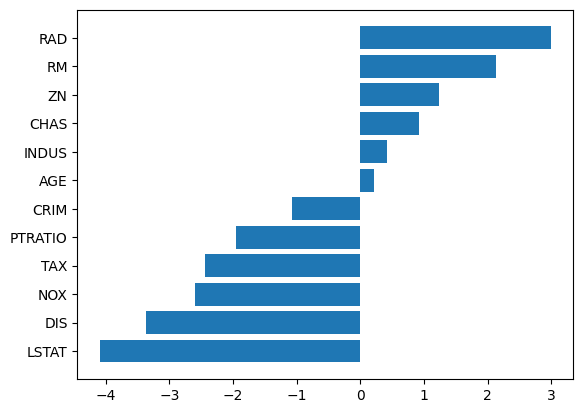

In [79]:
#hacemos un histograma horizontal
features = feat_coef.sort_values('importance_standarized')
plt.barh(features.index,features.importance_standarized)
plt.show()

In [80]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'LSTAT', 'MEDV'],
      dtype='object')

In [81]:
#eliminamos las variables poco importantes
X_train.drop(columns='CRIM', inplace=True)
X_train.drop(columns='PTRATIO', inplace=True)
X_train.drop(columns='TAX', inplace=True)
X_train.drop(columns='NOX', inplace=True)
X_train.drop(columns='DIS', inplace=True)
X_train.drop(columns='LSTAT', inplace=True)

X_test.drop(columns='CRIM',inplace=True)
X_test.drop(columns='PTRATIO',inplace=True)
X_test.drop(columns='TAX',inplace=True)
X_test.drop(columns='NOX',inplace=True)
X_test.drop(columns='DIS',inplace=True)
X_test.drop(columns='LSTAT',inplace=True)

#colcemos a crear el modelo
lm2 = LinearRegression()
lm2.fit(X_train,y_train)

#hacemos predicciones
pred2 = lm2.predict(X_test)

#calculamos los errores MAE, MSE, RMSE Y R2
print('MAE test', metrics.mean_absolute_error(y_test, pred2))
print('MSE test', metrics.mean_squared_error(y_test, pred2))
print('RMSE test', np.sqrt(metrics.mean_squared_error(y_test, pred2)))
print('R2 test', lm2.score(X_test,y_test))

MAE test 3.8189341369160905
MSE test 26.885989399630635
RMSE test 5.185170141820867
R2 test 0.7313955048856543


Practicamente no hay diferencia, solo un poco en el MSE, pero ganaremos velocidad en el modelo y simplificaremos.

In [85]:
#hay que aumentar el error de train para bajar el error de test
lm.fit(X_train, y_train)

y_pred = lm.predict(X_test)
#baseline_error = metrics.mean_squared_error(y_test, y_pred)

print("Train MSE:", metrics.mean_squared_error(y_train, lm.predict(X_train)))
print("Test MSE:", metrics.mean_squared_error(y_test, lm.predict(X_test)))
# print("Test RMSE:", np.sqrt(metrics.mean_squared_error(y_test, lr.predict(X_test))))

Train MSE: 38.04647401602626
Test MSE: 26.885989399630635


In [83]:
#aplicamos regularizacion
#ridge

from sklearn.linear_model import Ridge

ridgeR = Ridge(alpha = 10) #alpha es lambda 
ridgeR.fit(X_train, y_train)


Ridge(alpha=10)

In [87]:
print("Train MSE sin regularización:", round(metrics.mean_squared_error(y_train, lm.predict(X_train)),2))
print("Test MSE sin regularización:", round(metrics.mean_squared_error(y_test, lm.predict(X_test)),2))

print("Train MSE:", round(metrics.mean_squared_error(y_train, ridgeR.predict(X_train)),2))
print("Test MSE:", round(metrics.mean_squared_error(y_test, ridgeR.predict(X_test)),2))
# print("Test RMSE:", np.sqrt(metrics.mean_squared_error(y_test, ridgeR.predict(X_test))))

Train MSE sin regularización: 38.05
Test MSE sin regularización: 26.89
Train MSE: 38.25
Test MSE: 27.43


In [88]:
#lasso
from sklearn.linear_model import Lasso

lassoR = Lasso(alpha=0.1)
lassoR.fit(X_train, y_train)

print("Train MSE sin regularización:", round(metrics.mean_squared_error(y_train, lm.predict(X_train)),2))
print("Test MSE sin regularización:", round(metrics.mean_squared_error(y_test, lm.predict(X_test)),2))

print("Train MSE: %0.4f" % metrics.mean_squared_error(y_train, lassoR.predict(X_train)))
print("Test MSE: %0.4f" % metrics.mean_squared_error(y_test, lassoR.predict(X_test)))

Train MSE sin regularización: 38.05
Test MSE sin regularización: 26.89
Train MSE: 38.2128
Test MSE: 27.0489


In [91]:
#elastic net
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha = 0.02, l1_ratio=1)
elastic_net.fit(X_train, y_train) 

print("Train MSE: %0.4f" % metrics.mean_squared_error(y_train, elastic_net.predict(X_train)))
print("Test MSE: %0.4f" % metrics.mean_squared_error(y_test, elastic_net.predict(X_test)))

Train MSE: 38.0531
Test MSE: 26.8929


El método de regularización con el que sale menos error es elastic net, pero realamente sale muy parecido en los tres.